 Hari Kosuru, hk8663,
 Atreya Misra, am73676

In [2]:
import numpy as np
import pandas as pd

import random
from math import sqrt

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

Problem 1: K-Means

In [3]:
# Generate a random initialization
numPoints = 1000
numClusters = 3
min = 0
max = 1
# generatedPoints = []

random.seed(200)
threshHold = .1


def pythag(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


# for i in range(0, numPoints):
#     generatedPoints.append([random.uniform(min, max), random.uniform(min, max)])

generatedPoints = np.random.rand(numPoints, 2)

# Generate the initial k-means(randomly)
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]


def kMeanLoop(generatedPoints, means):
    converged = False
    while not converged:
        for i in range(0, len(generatedPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(generatedPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            diff = pythag(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > threshHold:
                converged = False

        if not converged:
            means = centroids


def kMeans(generatedPoints, k):
    for i in range(0, k):
        potentialMean = [random.uniform(min, max), random.uniform(min, max)]
#         while potentialMean in means:
#             potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop(generatedPoints, means)


def kMeanspp(generatedPoints, k):
    means.append([random.uniform(min, max), random.uniform(min, max)])
    for i in range(1, k):
        dists = []
        for point in generatedPoints:
            allDists = []
            for centroid in means:
                allDists.append(pythag(point, centroid) ** 2)
            dists.append(allDists[np.argmin(allDists)])

        p = []
        for j in dists:
            p.append(j / np.sum(np.array(dists)))

        means.append(generatedPoints[np.random.choice(len(generatedPoints), p=p)].tolist())

    kMeanLoop(generatedPoints, means)


# x_val = [x[0] for x in generatedPoints]
# y_val = [y[1] for y in generatedPoints]
#
# plt.scatter(x_val, y_val, label='Generated Points')
def display():
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]

        plt.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]

    plt.scatter(x_val, y_val, marker='x', color='k', s=50, label='Final Means')
    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()





# print 'Generated Points(Randomized):\n', np.asarray(generatedPoints)
# print '\nGenerated Means(Randomized):\n', means
# print '\nCalculated Clusters:\n', clusters
# print '\nCalculated Centroids:\n', centroids


K Means:

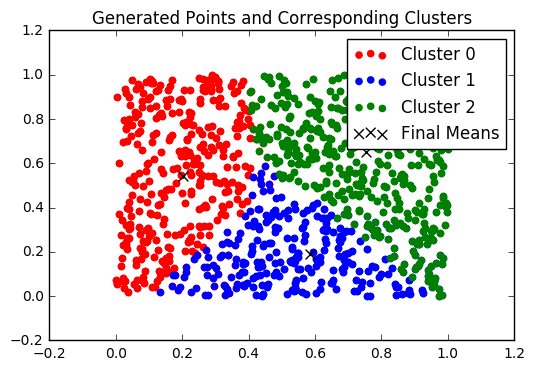

In [220]:
kMeans(generatedPoints, numClusters)
display()

K Means++:

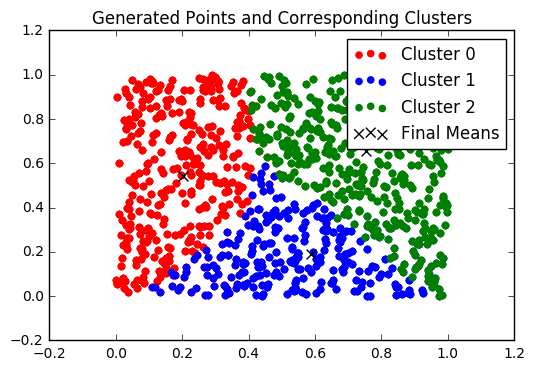

In [221]:
kMeanspp(generatedPoints, numClusters)
display()

Parts c & d

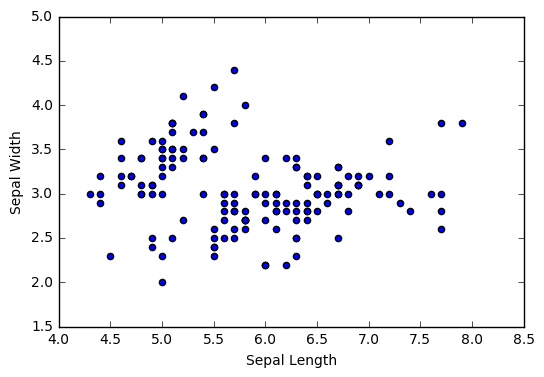

In [222]:
iris = pd.read_csv("iris_data.csv")

plt.scatter(iris["Sepal.Length"], iris["Sepal.Width"])
plt.ylabel("Sepal Width")
plt.xlabel("Sepal Length")
plt.show()

[[4.614509366143979, 4.949369827600178], [7.2, 3.6]]


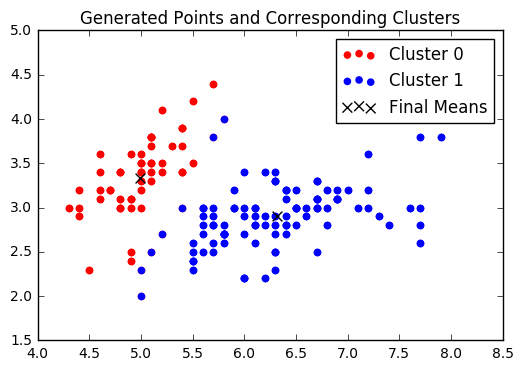

In [257]:
numClusters = 2;
means = []
centroids = []

min = 4
max = 8

clusters = [[] for _ in range(numClusters)]

numPoints = len(points)

x = iris["Sepal.Length"]
y = iris["Sepal.Width"]

d = {'Sepal Length': x, 'Sepal Width':y}
points = pd.DataFrame(data = d)
points = np.array(points)
# Generate the initial k-means(randomly)
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

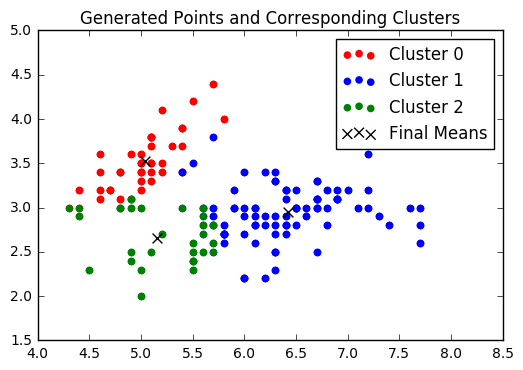

In [287]:
min = 4
max = 8

numClusters = 3;
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

Question 3

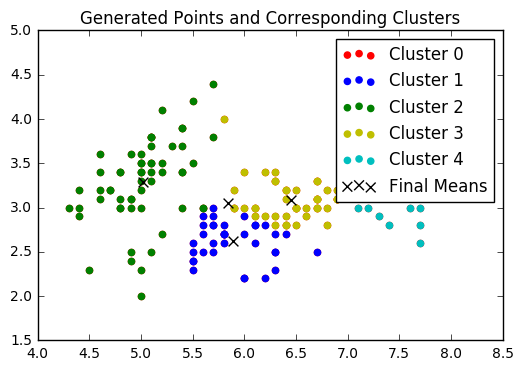

In [288]:
numClusters = 5;
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

Question 2

---------------------#2-------------------


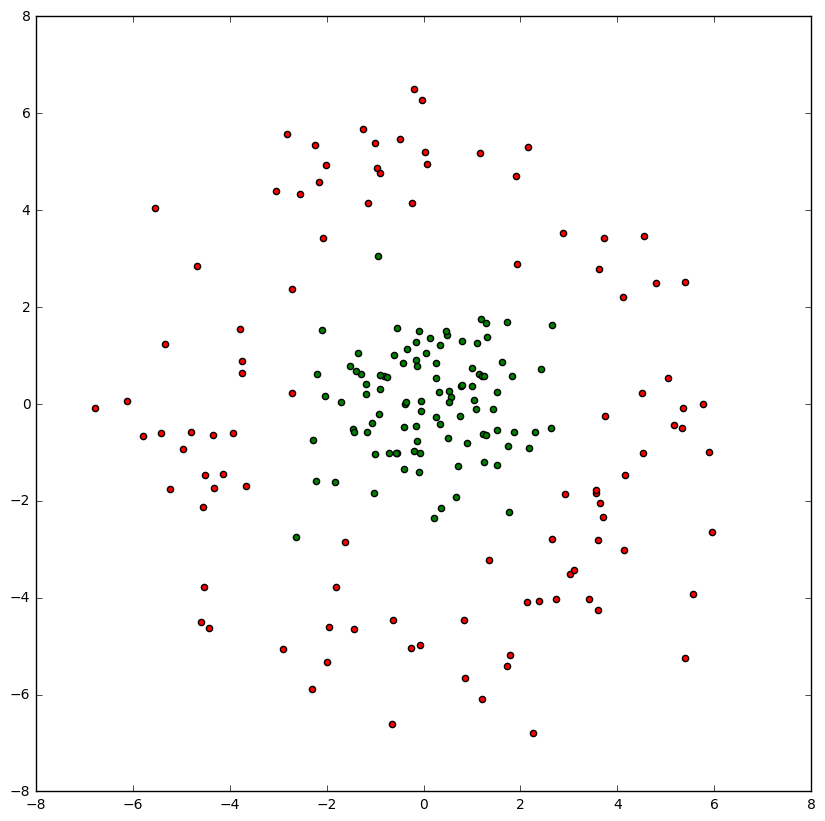

E neighborhood graph
SPECTRAL RESULT:


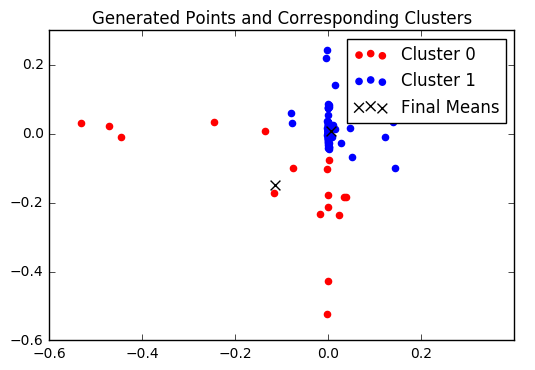

In [86]:
import math
from math import sqrt
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

print "---------------------#2-------------------" 
def createConcentricRings(points, rad1, rad2, var1, var2):
    inner = rad1
    outer = rad2
    thetaIn = np.random.normal(0,1,points)*2*math.pi
    thetaOut = np.random.normal(0,1,points)*2*math.pi
    innerNoiseX = np.random.normal(0, sqrt(var1), points)                          
    innerNoiseY = np.random.normal(0, sqrt(var2), points)
    outerNoiseX = np.random.normal(0, sqrt(var1), points)                          
    outerNoiseY = np.random.normal(0, sqrt(var2), points)
    xIn = [None] * len(thetaIn)
    yIn = [None] * len(thetaIn)                          
    xOut = [None] * len(thetaOut)
    yOut = [None] * len(thetaOut)   
    for i in range (len(thetaIn)):
        xIn[i] = inner*math.cos(thetaIn[i]) +innerNoiseX[i]
        yIn[i] = inner*math.sin(thetaIn[i]) +innerNoiseY[i]                 
        xOut[i] = outer*math.cos(thetaOut[i]) +outerNoiseX[i]
        yOut[i] = outer*math.sin(thetaOut[i]) +outerNoiseY[i]
    dataInner = np.transpose(([xIn,yIn]))
    dataOuter = np.transpose(([xOut,yOut]))
    data = np.vstack((dataInner, dataOuter))
    plt.figure(figsize=(10,10))
    plt.scatter(xIn,yIn, c = 'g')
    plt.scatter(xOut,yOut, c = 'r')
    plt.show()
    return(data)


min = -.5
max = .5
means = []
numClusters = 2
centroids = []
clusters = [[] for _ in range(numClusters)]
threshHold = 2

def pythag(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def kMeanLoop(generatedPoints, means):
    converged = False
    while not converged:
        for i in range(0, len(generatedPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(generatedPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            diff = pythag(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > threshHold:
                converged = False

        if not converged:
            means = centroids


def kMeans(generatedPoints, k):
    for i in range(0, k):
        potentialMean = [random.uniform(min, max), random.uniform(min, max)]
#         while potentialMean in means:
#             potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop(generatedPoints, means)
    
def display():
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]

        plt.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]

    plt.scatter(x_val, y_val, marker='x', color='k', s=50, label='Final Means')
    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()

def makeEuclidianDistanceMatrix(data):
    distanceMatrix=np.zeros((len(data),len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            distance = ((data[i,0]-data[j,0])**2+(data[i,1]-data[j,1])**2)**.5
            distanceMatrix[i,j]=distance
    return distanceMatrix

def makeSimilarityGraph(data, option, var):
    if(option==0):
        print "E neighborhood graph"
        similarityGraph = makeEuclidianDistanceMatrix(data)
        for i in range(len(similarityGraph)):
            for j in range(len(similarityGraph)):
                if(similarityGraph[i, j] > var):
                    similarityGraph[i,j] = 1
                else:
                    similarityGraph[i,j] = 0
    elif(option == 1):
        print "k-nearest neighbor graph - ignore direction"
    elif(option == 2):
        print "k-nearest neighbor graph - mutual neighbors"
    elif(option == 3):
        print "The fully connected graph"
        similarityGraph = np.zeros((len(data),len(data)))
        for i in range(len(similarityGraph)):
            for j in range(len(similarityGraph)):
                sigma = 1
                similarityGraph[i,j]=math.exp(-(((data[i,0] - data [j,0])**2)+((data[i,1] - data[j,1])**2))/(2*sigma**2))
        print similarityGraph
    else:
        print"Invalid input"
    return similarityGraph

def spectralCluster(simMatrix, k):
    w = np.zeros((len(simMatrix),len(simMatrix)))
    l = np.zeros((len(simMatrix),len(simMatrix)))
    for i in range(len(simMatrix)):
        sum=0.0
        for j in range(len(simMatrix)):
            sum+=simMatrix[j, i]
        w[i,i]=sum
    for i in range(len(simMatrix)):
        for j in range(len(simMatrix)):
            l[i,j]=w[i,j]-simMatrix[i,j]
    values,e =np.linalg.eig(l)
    e=e[:k]
    y=np.transpose(e)
    kMeans(y, k)
    print "SPECTRAL RESULT:"
    display()

datapoints=createConcentricRings(100, 1, 5, 1, 1)
g=makeSimilarityGraph(datapoints, 0, 1)
spectralCluster(g, 2)


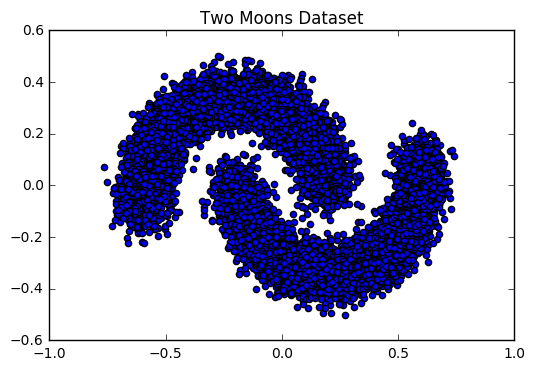

In [69]:
twoMoons = pd.read_csv("two_moons.csv", header = None)
linkedChains = pd.read_csv("linked_chains.csv", header = None)

plt.scatter(twoMoons[1], twoMoons[2])
plt.title('Two Moons Dataset')
plt.show()


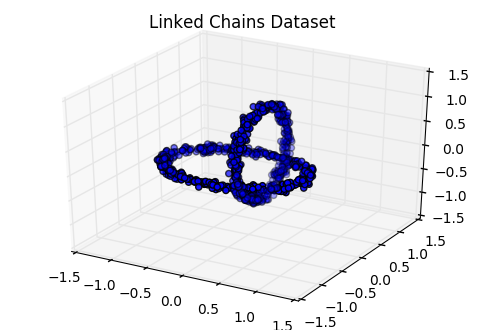

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(linkedChains[1], linkedChains[2], linkedChains[3])

plt.title("Linked Chains Dataset")
plt.show()

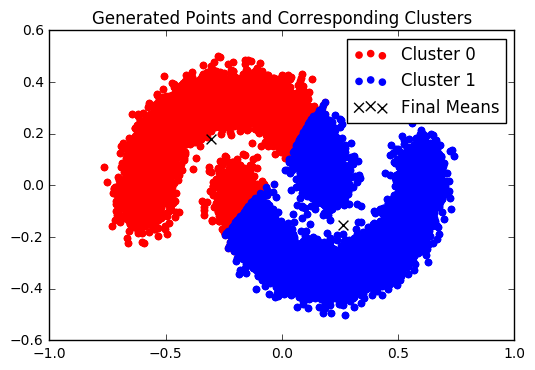

In [226]:
numClusters = 2;
means = []
centroids = []

random.seed(1)

clusters = [[] for _ in range(numClusters)]

d = {'X axis': twoMoons[1], 'Y axis': twoMoons[2]}
points = pd.DataFrame(data=d)
points = np.array(points)

numPoints = len(points)

kMeans(points, numClusters)
display()


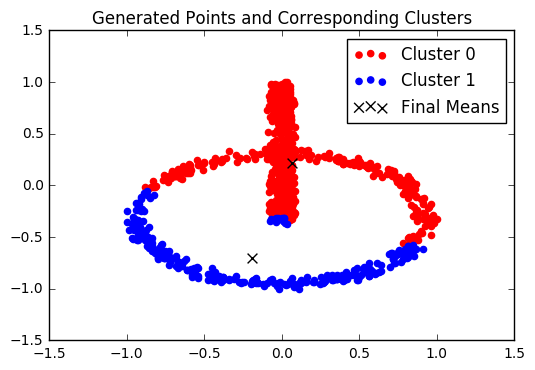

In [71]:
numClusters = 2;

random.seed(8)

def pythag3D(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2)

x = linkedChains[1]
y = linkedChains[2]
z = linkedChains[3]

# for i in range(0, numPoints):
#     generatedPoints.append([random.uniform(min, max), random.uniform(min, max)])

means = []
centroids = []

clusters = [[] for _ in range(numClusters)]


def kMeanLoop3D(generatedPoints, means):
    converged = False
    while not converged:
        for i in range(0, len(generatedPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag3D(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(generatedPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster]), np.mean([x[2] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            # print means[i]
            diff = pythag3D(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > .1:
                converged = False

        if not converged:
            means = centroids


def kMeans3D(generatedPoints, k):
    for i in range(0, k):
        potentialMean = [random.uniform(min, max), random.uniform(min, max), random.uniform(min, max)]
        #         while potentialMean in means:
        #             potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop3D(generatedPoints, means)


# x_val = [x[0] for x in generatedPoints]
# y_val = [y[1] for y in generatedPoints]
#
# plt.scatter(x_val, y_val, label='Generated Points')
def display3D():
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]
        z_val = [z[2] for z in clusters[i]]

        ax.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]
    z_val = [z[2] for z in centroids]


    ax.scatter(x_val, y_val, z_val, marker='x', color='k', s=50, label='Final Means')

    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()


d = {'X axis': x, 'Y axis': y, 'Z axis': z}
points = pd.DataFrame(data=d)
points = np.array(points)

# print points

numClusters = 2;

kMeanspp(points, numClusters)
display()


SPECTRAL RESULT:


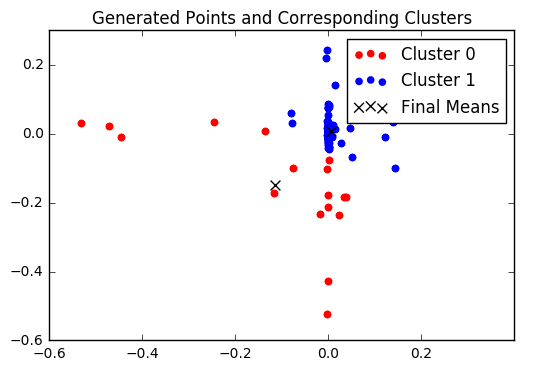

K-MEANS RESULT:


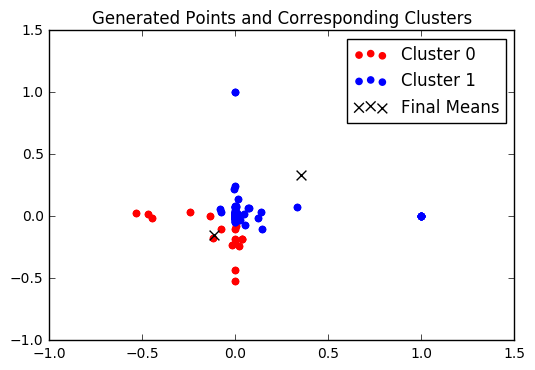

In [87]:
spectralCluster(g, 2)

kMeans(g, 2)
print "K-MEANS RESULT:"
display()

In general, K-Means clustering seems to work better, atleast for the data points that we constructed. Their results, however, are very similar. Our justification for why K-means is slightly better is that the data set favors more compact forms, and the general magnitude of the eigen values is relatively small (ie. there aren't strongly linked connections throughout the graph).